<a href="https://colab.research.google.com/github/icode150/analysis/blob/main/petrol_inflation_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Import libraries
import pandas as pd
from datetime import datetime

#Query and download Petrol and Diesel Price Datasets from the web.
df_petrol= pd.read_html("https://www.petroldieselprice.com/petrol-price-previous-historical-trend-chart-in-Hyderabad/Telangana")[0]

df_diesel=pd.read_html('https://www.petroldieselprice.com/diesel-price-previous-historical-trend-chart-in-Hyderabad/Telangana')[0]


In [ ]:
#We visualise the both dataframes for content and consistency
df_petrol.head(5)
df_diesel.head(5)

df_petrol.info()
df_diesel.info()

#As found above both the dataframes are same, only differing in pricing column.
#We eliminate the price column check the both the dataframes for similarity

df_petrol_dummy = df_petrol.iloc[:, :-1]
df_diesel_dummy = df_diesel.iloc[:, :-1]
df_petrol_dummy.equals(df_diesel_dummy)

#As bothe the dataframes are similar, we copy the diesel price onto the petrol price dataframe for a unified dataframe

df_petrol['Diesel Price']=df_diesel['diesel PRICE Rs./Lit'].values

df_fuelprice=df_petrol

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70 entries, 0 to 69
Data columns (total 4 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   YEAR                  70 non-null     int64 
 1   MONTH                 70 non-null     object
 2   DATE                  70 non-null     object
 3   petrol PRICE Rs./Lit  70 non-null     object
dtypes: int64(1), object(3)
memory usage: 2.3+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70 entries, 0 to 69
Data columns (total 4 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   YEAR                  70 non-null     int64 
 1   MONTH                 70 non-null     object
 2   DATE                  70 non-null     object
 3   diesel PRICE Rs./Lit  70 non-null     object
dtypes: int64(1), object(3)
memory usage: 2.3+ KB


Formatting

In [ ]:
#Format the Date Column to Date format for consistency(i.e, convert it to date format).
def format_date(x):
    date = datetime.strptime(x,'%d-%b-%y')
    fdate=date.strftime("%m-%Y")
    return fdate

df_fuelprice['Month-Year']=df_fuelprice['DATE'].apply(format_date)

#Rename the Petrol Price
df_fuelprice.rename(columns={'petrol PRICE Rs./Lit':'Petrol Price'},inplace=True)

#Format the String Price columns to float
def format_price(x):                
    x= x.replace("₹","")
    return float(x)

df_fuelprice['Petrol Price']=df_fuelprice['Petrol Price'].apply(format_price)
df_fuelprice['Diesel Price']=df_fuelprice['Diesel Price'].apply(format_price)



In [ ]:
#Add the price change % for petrol and diesel columns
df_fuelprice['Pricechange%_petrol'] = df_fuelprice['Petrol Price'].pct_change(1)
df_fuelprice['Pricechange%_diesel'] = df_fuelprice['Diesel Price'].pct_change(1)


# **Inflation dataset Creation**

In [ ]:
#Download the inflation data with  pandas
df_inflation = pd.read_html('https://www.rateinflation.com/inflation-rate/india-historical-inflation-rate/')[0]

#Drop the annual value column for redundancy
df_inflation = df_inflation.drop(['Annual'], axis=1)


In [ ]:
#Unpivot the data with melt function for usage and consistency.
df_inflation = pd.melt(df_inflation, id_vars = 'Year')

#Drop rows with nan values
df_inflation.dropna(inplace=True)

#Create a cumulative Month-year column with concatenation of Montha and year values
df_inflation['Month-Year'] = df_inflation['variable'].apply(lambda x: x.title()) + '-'+ df_inflation['Year'].apply(lambda x: str(x))

#Format the Month-year to date time type column
def format_date(x):
    date = datetime.strptime(x,'%b-%Y')
    fdate=date.strftime("%m-%Y")
    return fdate
df_inflation['Month-Year']=df_inflation['Month-Year'].apply(format_date)

#Rename value column to Inflation
df_inflation.rename(columns={'value':'Inflation'},inplace=True)

#Foramt the str inflation column to float type column
df_inflation['Inflation']=df_inflation['Inflation'].apply(lambda x: str(x).replace('%',''))
df_inflation['Inflation']=pd.to_numeric(df_inflation['Inflation'])


In [ ]:
df_inflation.head(32)

**Merge the two dataframes


In [ ]:
#Merge the prices and inflation dataset for unified data.
df=pd.merge(df_fuelprice,df_inflation, on='Month-Year', how='left')
df.head()

#Drop the redundant columns from the merge sequence
df.drop(['Year','variable'],axis=1,inplace=True)

#Format the Month-year str column to date type column
df["DATE"]= pd.to_datetime(df["Month-Year"])
df.head()

#Move the Month year column to 3rd position in Index
monthyear=df.pop('Month-Year')
df.insert(3, 'Month-Year', monthyear)



In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.lineplot(y = "Pricechange%_petrol", x = "DATE", data=df)
sns.lineplot(x='DATE', y='Pricechange%_diesel', data=df)
sns.lineplot(x='DATE', y='Inflation', data=df)

plt.show()



<ipython-input-358-98aeabd692eb>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  dataplot = sns.heatmap(df.corr(), cmap="YlGnBu", annot=True)


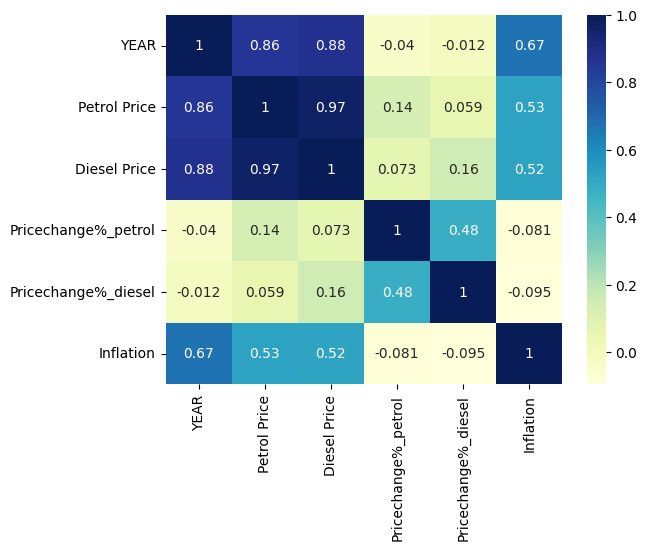

In [ ]:
  
# plotting correlation heatmap
dataplot = sns.heatmap(df.corr(), cmap="YlGnBu", annot=True)

import matplotlib.pyplot as mp
mp.show()